In [38]:
!pip3 install wordcloud
!pip install tensorflow
!pip install tensorflow-cpu

  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into accou

  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into acco

In [39]:
import os
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
import os
import pandas as pd

def process_artist_lyrics(artist_csv_path):
    """
    Processes the lyrics from an artist's CSV file.

    Args:
        artist_csv_path (str): The path to the artist's CSV file.

    Returns:
        pd.Series: A pandas Series containing the lyrics.
    """
    try:
        # Read the CSV file without assuming a header row
        df = pd.read_csv(artist_csv_path, header=None)
        # Assume lyrics are in the first column (index 0)
        return df[0]  # Return the first column as a Series
    except KeyError:
        print(f"Warning: Column 0 not found in {artist_csv_path}. Skipping.")
        return pd.Series(dtype=object)  # Return an empty Series if 'Lyric' column is missing
    except pd.errors.EmptyDataError:
        print(f"Warning: {artist_csv_path} is empty. Skipping.")
        return pd.Series(dtype=object)
    except FileNotFoundError:
        print(f"Warning: {artist_csv_path} not found. Skipping.")
        return pd.Series(dtype=object)


def combine_artist_lyrics(artist_csv_directory):
    """
    Combines lyrics from all artist CSV files in a directory.

    Args:
        artist_csv_directory (str): The directory containing the artist CSV files.

    Returns:
        pd.DataFrame: A pandas DataFrame containing all the combined lyrics.
    """
    csv_files = [file for file in os.listdir(artist_csv_directory) if file.endswith('.csv')]

    # Check if any CSV files were found
    if not csv_files:
        print("Warning: No CSV files found in the directory.")
        return pd.DataFrame(columns=['Lyric'])  # Return empty DataFrame with the correct column

    # Initializing an empty list to store individual artist lyric DataFrames
    artist_lyric_dfs = []

    # Processing each artist's lyrics
    for csv_file in csv_files:
        artist_csv_path = os.path.join(artist_csv_directory, csv_file)
        artist_lyrics = process_artist_lyrics(artist_csv_path)
        artist_lyric_dfs.append(artist_lyrics)

    # Concatenating the individual artist lyric DataFrames into one DataFrame
    combined_lyrics_df = pd.concat(artist_lyric_dfs, ignore_index=True)
    # Assign the combined lyrics to a column named 'Lyric'
    combined_lyrics_df = combined_lyrics_df.to_frame(name='Lyric')
    return combined_lyrics_df

In [41]:
import os
import pandas as pd

# Assuming your CSV files are in a directory named 'artist_lyrics'
artist_csv_directory = '/csv_order'

# Call the function to combine lyrics and assign the result to 'data'
data = combine_artist_lyrics(artist_csv_directory)

In [42]:
data.head()

,Lyric
0,Artist
1,Selena Gomez
2,Selena Gomez
3,Selena Gomez
4,Selena Gomez


In [43]:
data.shape

(5769, 1)

## **Data Visualization**

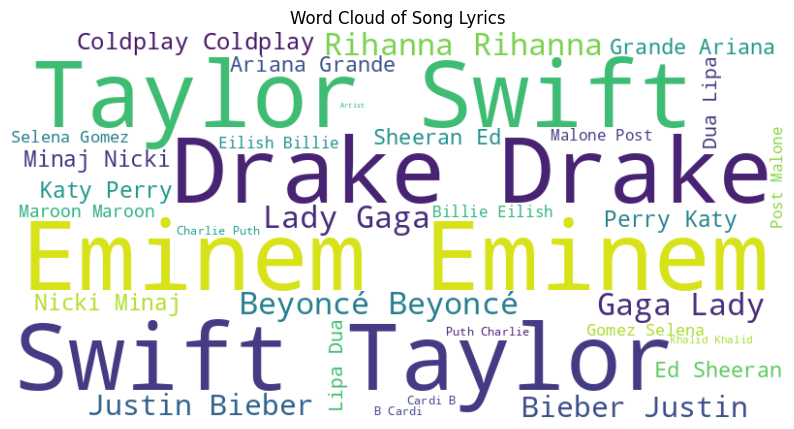

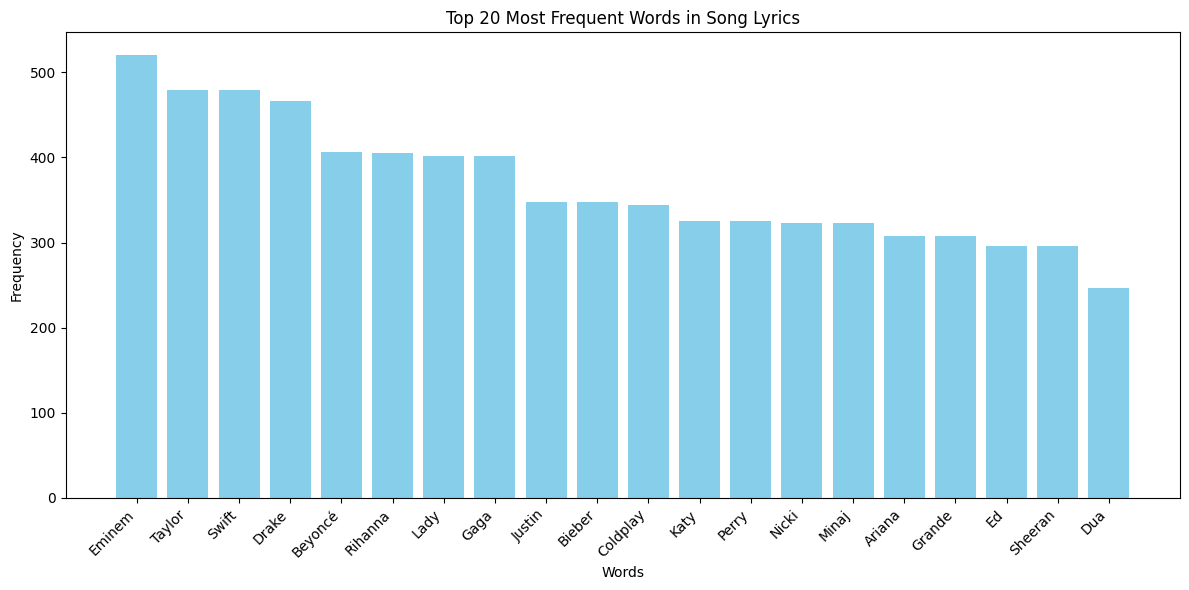

In [44]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Lyric']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Lyrics')
plt.axis('off')
plt.show()

# Bar plot of most frequent words
from collections import Counter

# Combining all lyrics into a single string
all_lyrics = ' '.join(data['Lyric'])

# Split the string into words
words = all_lyrics.split()

# Counting the frequency of each word
word_counts = Counter(words)

# Getting the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Extracting words and counts
words, counts = zip(*top_20_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Frequent Words in Song Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## **Data Preprocessing**

In [45]:
# Tokenization: Converting words into integers
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Lyric'])

total_words = len(tokenizer.word_index) + 1

# Creating input sequences
input_sequences = []
for line in data['Lyric']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Padding sequences and creating predictors and label
max_sequence_length = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Printing the shape of padded sequences
print("Shape of padded sequences:", input_sequences.shape)

Shape of padded sequences: (3543, 2)


## **Model Building**

In [46]:
# Defining a generator function for batch processing
def sequence_generator(input_sequences, labels, batch_size):
    num_batches = len(input_sequences) // batch_size
    while True:
        for batch in range(num_batches):
            start = batch * batch_size
            end = (batch + 1) * batch_size
            yield X[start:end, :], y[start:end, :]

# Model definition
model = Sequential()
model.add(Embedding(total_words, 100, input_shape=(max_sequence_length,)))
model.add(Bidirectional(LSTM(150, return_sequences=True))) # LSTM for sequence processing
model.add(Dropout(0.2)) # Prevents overfitting
model.add(LSTM(100))
model.add(Dense(total_words // 2, activation='relu')) # Hidden layer
model.add(Dense(total_words, activation='softmax')) # Output layer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 2, 100)              │           3,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 2, 300)              │         301,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 300)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 18)                  │           1,818 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 36)                  │             684 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 467,702 (1.78 MB)

 Trainable params: 467,702 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Training the model using fit_generator
batch_size = 64
num_epochs = 25
steps_per_epoch = len(input_sequences) // (batch_size)

model.fit(
    sequence_generator(X, y, batch_size),
    epochs=num_epochs,
    steps_per_epoch=steps_per_epoch,
    verbose=1
)

Epoch 1/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.1758 - loss: 3.5728
Epoch 2/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6601 - loss: 3.0328
Epoch 3/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4363 - loss: 1.5009
Epoch 4/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3428 - loss: 1.7966
Epoch 5/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6921 - loss: 1.0854
Epoch 6/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6162 - loss: 0.9524
Epoch 7/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5576 - loss: 1.0108
Epoch 8/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5008 - loss: 1.1454
Epoch 9/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5885 - loss: 0.8200
Epoch 10/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6645 - loss: 0.6994
Epoch 11/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6751 - loss: 0.6791
Epoch 12/25
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy:

In [48]:
# Generating lyrics
def generate_lyrics(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

generated_lyrics = generate_lyrics("We are in")
print(generated_lyrics)

We are in malone swift swift swift swift swift swift swift swift swift


In [49]:
# Saving the model
model.save('/model1.h5')